In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data = pd.read_csv('train (1).csv')

In [29]:
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [30]:
data=data.drop(['id'], axis = 1)

In [31]:
# Define bins and labels for categorizing age groups
age_bins = [0, 12, 19, 35, 60, 100]  # Age range from 0 to 100
age_labels = ['Child', 'Teen', 'Young Adult', 'Middle-Aged Adult', 'Senior']
 
# Convert the 'Age' column to categorical using the bins and labels
data['Age'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

In [32]:
data.dtypes

Gender                              object
Age                               category
Height                             float64
Weight                             float64
family_history_with_overweight      object
FAVC                                object
FCVC                               float64
NCP                                float64
CAEC                                object
SMOKE                               object
CH2O                               float64
SCC                                 object
FAF                                float64
TUE                                float64
CALC                                object
MTRANS                              object
NObeyesdad                          object
dtype: object

In [33]:
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

from scipy.stats import chi2_contingency

for column in data.columns:
    if column != 'NObeyesdad':
        contingency_table = pd.crosstab(data[column], data['NObeyesdad'])  # Create a contingency table
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-square test between {column} and NObeyesdad: Chi2 = {chi2}, p-value = {p}")

# Robust Scaler 

In [34]:
from sklearn.preprocessing import RobustScaler
# Fit the scaler on the training data and transform both training and testing data

 
numerical_features=['Height','Weight','FCVC','NCP','CH2O','FAF','TUE','BMI']
# Initialize the RobustScaler
scaler = RobustScaler()

data1 = data[numerical_features].apply(pd.to_numeric, errors='coerce')



In [35]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Male,Young Adult,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,Female,Teen,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,Female,Teen,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,Female,Young Adult,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,Male,Young Adult,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151


In [36]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb

LabelEncoder()

In [37]:
data['Gender'] = lb.fit_transform(data['Gender'])
data['Age'] = lb.fit_transform(data['Age'])
data['family_history_with_overweight'] = lb.fit_transform(data['family_history_with_overweight'])
data['FAVC'] = lb.fit_transform(data['FAVC'])
data['CAEC'] = lb.fit_transform(data['CAEC'])
data['SMOKE'] = lb.fit_transform(data['SMOKE'])
data['SCC'] = lb.fit_transform(data['SCC'])
data['CALC'] = lb.fit_transform(data['CALC'])
data['MTRANS'] = lb.fit_transform(data['MTRANS'])
data['NObeyesdad'] = lb.fit_transform(data['NObeyesdad'])

In [38]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,1,3,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,6,28.259565
1,0,2,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,1,23.422091
2,0,2,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,0,17.126706
3,0,3,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,4,44.855798
4,1,3,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,6,25.599151


In [39]:
data.dtypes  #checking datatypes

Gender                              int32
Age                                 int32
Height                            float64
Weight                            float64
family_history_with_overweight      int32
FAVC                                int32
FCVC                              float64
NCP                               float64
CAEC                                int32
SMOKE                               int32
CH2O                              float64
SCC                                 int32
FAF                               float64
TUE                               float64
CALC                                int32
MTRANS                              int32
NObeyesdad                          int32
BMI                               float64
dtype: object

In [40]:
data.corr()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
Gender,1.000000,0.046677,0.623507,0.118613,0.095786,0.021812,-0.312766,0.039468,0.046129,0.063349,0.053298,-0.061442,0.238399,0.058696,0.037345,-0.140049,0.046575,-0.091479
Age,0.046677,1.000000,0.112471,0.165421,0.020362,-0.004920,0.114172,-0.006579,0.013594,0.028494,0.134678,-0.002904,0.006671,0.053071,-0.062279,0.400566,0.085067,0.135122
Height,0.623507,0.112471,1.000000,0.416677,0.228137,0.115566,-0.071546,0.191383,0.069003,0.069748,0.183706,-0.095923,0.295278,0.076433,-0.089138,-0.049543,0.060786,0.098126
Weight,0.118613,0.165421,0.416677,1.000000,0.514147,0.228770,0.245682,0.095947,0.337331,0.040416,0.317914,-0.185116,-0.084845,-0.086471,-0.216673,-0.008431,0.431821,0.941071
family_history_with_overweight,0.095786,0.020362,0.228137,0.514147,1.000000,0.152154,0.047756,0.044778,0.204263,0.018782,0.191588,-0.166760,-0.094414,0.005762,0.002330,-0.109662,0.321325,0.498820
FAVC,0.021812,-0.004920,0.115566,0.228770,0.152154,1.000000,0.006952,0.011522,0.115675,-0.016009,0.039167,-0.111897,-0.067030,0.034843,-0.080184,-0.026666,0.010176,0.215523
FCVC,-0.312766,0.114172,-0.071546,0.245682,0.047756,0.006952,1.000000,0.113349,-0.010870,-0.012191,0.101299,0.022120,-0.089822,-0.147843,-0.128793,0.093622,0.041076,0.296933
NCP,0.039468,-0.006579,0.191383,0.095947,0.044778,0.011522,0.113349,1.000000,-0.089957,0.006820,0.080949,0.006633,0.100871,0.067459,-0.099421,-0.001813,-0.091154,0.048736
CAEC,0.046129,0.013594,0.069003,0.337331,0.204263,0.115675,-0.010870,-0.089957,1.000000,-0.019703,0.132820,-0.099427,-0.092035,-0.049646,-0.066821,-0.051645,0.297420,0.350495
SMOKE,0.063349,0.028494,0.069748,0.040416,0.018782,-0.016009,-0.012191,0.006820,-0.019703,1.000000,-0.023475,0.017185,0.008374,-0.016093,-0.023254,-0.022203,-0.001393,0.013129


 Weight and BMI show a very high correlation (0.941071), which is expected since BMI is directly related to weight.
 Weight and CALC (0.431821), Moderate correlation, potentially indicating a relationship between weight and calculated calorie intake or expenditure.
 


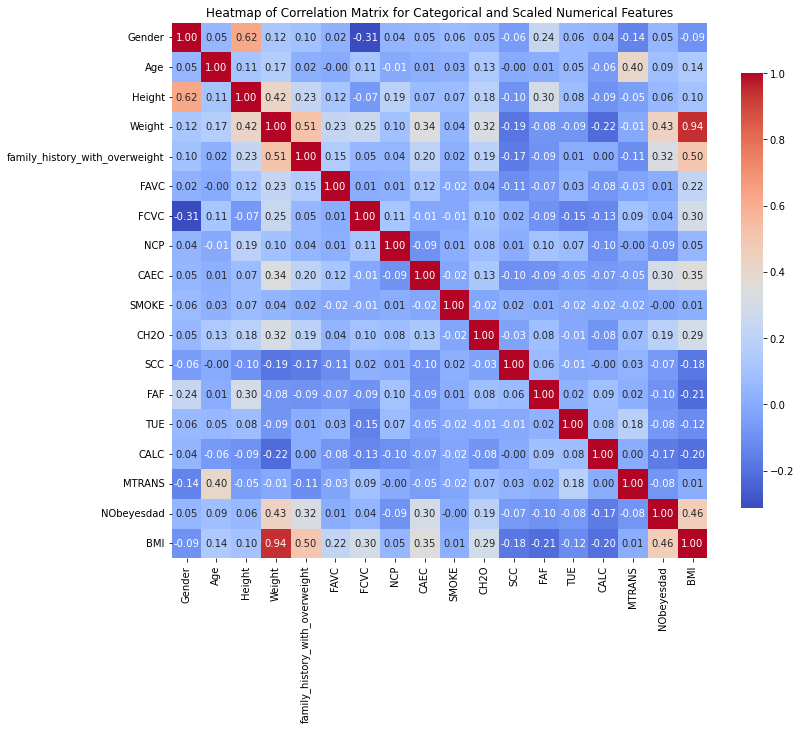

In [41]:
correlation_matrix = data.corr()

# Step 5: Create the heatmap
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap of Correlation Matrix for Categorical and Scaled Numerical Features')
plt.show()

In [42]:
from sklearn.feature_selection import chi2
X = data[['Gender', 'family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']]
y = data['NObeyesdad']

# Perform chi2 test
f_p_values = chi2(X, y)

print(f_p_values)

(array([3993.35992613, 1158.53642875,  132.92448391,  379.18547097,
        213.7476861 ,  990.88207073,  420.9146261 ,  939.11332165]), array([0.00000000e+000, 4.50028287e-247, 3.11173083e-026, 8.31985614e-079,
       2.23933634e-043, 8.38299766e-211, 8.89150756e-088, 1.31319458e-199]))


In [43]:
p_values = pd.Series(f_p_values[1])
p_values.index = X.columns
p_values

Gender                             0.000000e+00
family_history_with_overweight    4.500283e-247
FAVC                               3.111731e-26
CAEC                               8.319856e-79
SMOKE                              2.239336e-43
SCC                               8.382998e-211
CALC                               8.891508e-88
MTRANS                            1.313195e-199
dtype: float64

In [44]:
p_values.sort_index(ascending = False)

family_history_with_overweight    4.500283e-247
SMOKE                              2.239336e-43
SCC                               8.382998e-211
MTRANS                            1.313195e-199
Gender                             0.000000e+00
FAVC                               3.111731e-26
CALC                               8.891508e-88
CAEC                               8.319856e-79
dtype: float64

All the listed features are highly statistically significant in relation to target variable. This indicates that each of these features has a strong association with the target and can be considered important for the predictive model.

In [45]:
X = data.drop(['CAEC','CALC','NObeyesdad'],axis=1)
y = data['NObeyesdad']

In [46]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,MTRANS,BMI
0,1,3,1.699998,81.669950,1,1,2.000000,2.983297,0,2.763573,0,0.000000,0.976473,3,28.259565
1,0,2,1.560000,57.000000,1,1,2.000000,3.000000,0,2.000000,0,1.000000,1.000000,0,23.422091
2,0,2,1.711460,50.165754,1,1,1.880534,1.411685,0,1.910378,0,0.866045,1.673584,3,17.126706
3,0,3,1.710730,131.274851,1,1,3.000000,3.000000,0,1.674061,0,1.467863,0.780199,3,44.855798
4,1,3,1.914186,93.798055,1,1,2.679664,1.971472,0,1.979848,0,1.967973,0.931721,3,25.599151


In [47]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)



from sklearn.metrics import accuracy_score
# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8338


In [50]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier with default parameters
xgb = XGBClassifier(random_state=42)

# Fit the model to the training data
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [51]:
y_train_pred =xgb.predict(X_train)
y_test_pred =xgb.predict(X_test)

In [52]:
# Training Accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    
    # Testing Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
    
    # Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
    
    # Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 97.88%
Testing Accuracy: 89.60%

Confusion Matrix:
[[489  31   0   0   0   3   1]
 [ 32 546   0   0   0  43   5]
 [  2   1 470  11   1  16  42]
 [  0   0  21 631   3   0   2]
 [  0   0   0   1 802   1   0]
 [  1  38  12   0   0 373  60]
 [  0  10  39   3   0  53 409]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       524
           1       0.87      0.87      0.87       626
           2       0.87      0.87      0.87       543
           3       0.98      0.96      0.97       657
           4       1.00      1.00      1.00       804
           5       0.76      0.77      0.77       484
           6       0.79      0.80      0.79       514

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152

